In [2]:
# Useful starting lines
import numpy as np
from helpers import *
from implementations import *
from process_data import *
from crossvalidation import *
from select_parameter import *

import matplotlib.pyplot as plt    
%load_ext autoreload
%autoreload 2

seed=10

In [3]:
from zipfile import ZipFile 
  
# # specifying the zip file name 
file_name = 'Data/test.csv.zip'
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Data/') 

In [4]:
def accuracy_per_parameters(degrees, lambdas, alphas, k_fold, y, tX, jet):
    
    # condider a specific jet
    msk_jets = get_jet_masks(tX)
    tX = tX[msk_jets[jet]]
    y = y[msk_jets[jet]]
    
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    accu_te = []
    accu_tr = []

    for degree in degrees:
        for lamb in lambdas:
            for alpha in alphas:
                accs_test = []
                accs_train = []
                for k in range(k_fold):
                        acc_train, acc_test = cross_validation(y, tX, ridge_regression, k_indices, k, degree, alpha, lamb)
                        accs_test.append(acc_test)
                        accs_train.append(acc_train)
                accu_te.append(np.mean(accs_test))
                accu_tr.append(np.mean(accs_train))
   
    return accu_tr, accu_te

In [5]:
y, tX, ids = load_csv_data('Data/train.csv')
_, tX_test, ids_test = load_csv_data('Data/test.csv')

# Comparing the 6 methods

we observe that Ridge is the best

# Grid Search to set the best parameter

copy the code from the main

### How accuracy change with the parameters?

We evalute how accuracy change fixing 2 parameters per time

# Alpha 
finxing degree and 

In [12]:
# Model parameters for ridge regression
#tuning parameters for each category
degrees = [5]
alphas=np.arange(2,8)
lambdas=[1e-06]
k_fold = 3
jet=0

accu_train, accu_test = accuracy_per_parameters(degrees, lambdas, alphas, k_fold, y, tX, jet)

5 1e-06 2
5 1e-06 2
5 1e-06 2
5 1e-06 3
5 1e-06 3
5 1e-06 3
5 1e-06 4
5 1e-06 4
5 1e-06 4
5 1e-06 5
5 1e-06 5
5 1e-06 5
5 1e-06 6
5 1e-06 6
5 1e-06 6
5 1e-06 7
5 1e-06 7
5 1e-06 7


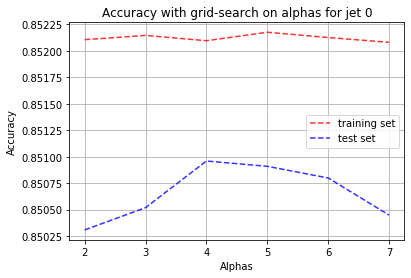

In [13]:
plt.plot(alphas,accu_train,'r--',  alpha=0.8,label='training set')
plt.plot(alphas,accu_test,'b--',  alpha=0.8,label='test set')
plt.legend(loc="center right")
plt.xlabel('Alphas')
plt.ylabel('Accuracy')
plt.title('Accuracy with grid-search on alphas for jet {c}'.format(c=jet))
plt.grid(True)

plt.show()

# Degree

In [16]:
# Model parameters for ridge regression
#tuning parameters for each category
degrees = np.arange(1,8)
alphas=[4]
lambdas=[1e-06]
k_fold = 3
jet=0

accu_train, accu_test  = accuracy_per_parameters(degrees, lambdas, alphas, k_fold, y, tX, jet)

1 1e-06 4
1 1e-06 4
1 1e-06 4
2 1e-06 4
2 1e-06 4
2 1e-06 4
3 1e-06 4
3 1e-06 4
3 1e-06 4
4 1e-06 4
4 1e-06 4
4 1e-06 4
5 1e-06 4
5 1e-06 4
5 1e-06 4
6 1e-06 4
6 1e-06 4
6 1e-06 4
7 1e-06 4
7 1e-06 4
7 1e-06 4


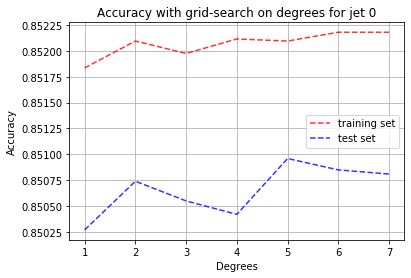

In [17]:
plt.plot(degrees,accu_train,'r--',  alpha=0.8,label='training set')
plt.plot(degrees,accu_test,'b--',  alpha=0.8,label='test set')
plt.legend(loc="center right")
plt.xlabel('Degrees')
plt.ylabel('Accuracy')
plt.title('Accuracy with grid-search on degrees for jet {c}'.format(c=jet))
plt.grid(True)

plt.show()

# Lambda

In [19]:
# Model parameters for ridge regression
#tuning parameters for each category
degrees = [5]
alphas=[4]
lambdas=np.logspace(-7,-1,7)
k_fold = 3
jet=0

accu_train, accu_test  = accuracy_per_parameters(degrees, lambdas, alphas, k_fold, y, tX, jet)

5 1e-07 4
5 1e-07 4
5 1e-07 4
5 1e-06 4
5 1e-06 4
5 1e-06 4
5 1e-05 4
5 1e-05 4
5 1e-05 4
5 0.0001 4
5 0.0001 4
5 0.0001 4
5 0.001 4
5 0.001 4
5 0.001 4
5 0.01 4
5 0.01 4
5 0.01 4
5 0.1 4
5 0.1 4
5 0.1 4


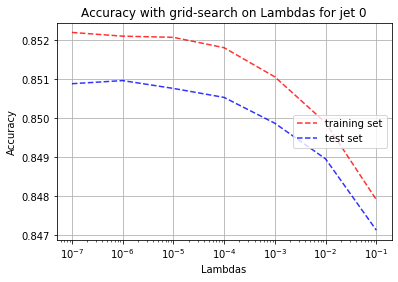

In [20]:
plt.plot(lambdas,accu_train,'r--',  alpha=0.8,label='training set')
plt.plot(lambdas,accu_test,'b--',  alpha=0.8,label='test set')
plt.legend(loc="center right")
plt.xlabel('Lambdas')
plt.ylabel('Accuracy')
plt.title('Accuracy with grid-search on Lambdas for jet {c}'.format(c=jet))
plt.grid(True)
plt.xscale('log')
plt.show()